Imports and Data Loading

In [176]:
import pandas as pd 
import matplotlib.pyplot as plt

In [177]:
df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df4 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df5 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

df = [df1, df2, df3, df4, df5]
df = pd.concat(df)
df.shape

(826581, 11)

In [178]:
df.dropna(inplace=True)
print(df.shape)
print(df.columns)
df.describe()

(117527, 11)
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')


,floor_area_sqm,lease_commence_date,resale_price
count,117527.000000,117527.000000,1.175270e+05
mean,97.428947,1993.106758,4.385408e+05
std,24.259687,12.338690,1.480609e+05
min,31.000000,1966.000000,1.400000e+05
25%,77.000000,1984.000000,3.330000e+05
50%,95.000000,1993.000000,4.088880e+05
75%,112.000000,2002.000000,5.080000e+05
max,280.000000,2019.000000,1.258000e+06


In [179]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64


Data Transformation

In [180]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

df = df.replace({'flat_model': replace_values})

df['flat_model'].value_counts()

flat_model
Model A                 37431
Improved                29578
New Generation          17389
Premium Apartment       12246
Simplified               5240
Apartment                4679
Maisonette               3618
Standard                 3441
Model A2                 1621
DBSS                     1537
Type S1S2                 400
Adjoined flat             202
Terrace                    70
Multi Generation           42
Executive Maisonette       30
2-room                      3
Name: count, dtype: int64

In [181]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0,70
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0,65
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0,64
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0,63
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,YISHUN,5 ROOM,716,YISHUN ST 71,07 TO 09,131.0,Improved,1987,440000.0,66 years 03 months
80370,2020-09,YISHUN,5 ROOM,760,YISHUN ST 72,07 TO 09,122.0,Improved,1987,458000.0,65 years 06 months
80371,2020-09,YISHUN,5 ROOM,835,YISHUN ST 81,04 TO 06,122.0,Improved,1987,490000.0,66 years 04 months
80372,2020-09,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,146.0,Maisonette,1987,558000.0,66 years 03 months


In [182]:
# Transform datetime in string to datetime Y-m format
# df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# def get_floor(row):
#     floors = row['storey_range'].split(" TO ")
#     start = int(floors[0])
#     end = int(floors[1])
#     return pd.Series([start, end])

# # Transform floor range into two integer columns
# df[['floor-range-start', 'floor-range-end']]  = df.apply(get_floor, axis=1)

storey_r = df['storey_range'].unique()
storey_r.sort()
storey_mapping = {storey: idx + 1 for idx, storey in enumerate(storey_r)}
df['storey_range'] = df['storey_range'].map(storey_mapping)

In [183]:
# Transform flat type room number in string to single integer
# 4 ROOM --> (4)

# 5 ROOM --> (5)

# 3 ROOM --> (3)

# 2 ROOM --> (2)

# 1 ROOM --> (1)

# EXECUTIVE --> (6)

# MULTI-GENERATION --> (7)

flat_types = df['flat_type'].unique()
flat_types.sort()
digit_mapping = {flat_type: idx + 1 for idx, flat_type in enumerate(flat_types)}
df['flat_type'] = df['flat_type'].map(digit_mapping)


In [184]:
# Transform range storey into digits
# '04 TO 06' --> 1
#  '07 TO 09' --> 2
#  '10 TO 12' --> 3
#  '01 TO 03' --> 4
#  '13 TO 15' --> 5
#  '16 TO 18' --> 6
#  '19 TO 21' --> 7
#  '22 TO 24' --> 8
#  '25 TO 27' --> 9
#  '28 TO 30' --> 10
#  '34 TO 36' --> 11
#  '31 TO 33' --> 12
#  '37 TO 39' --> 13
#  '40 TO 42' --> 14
#  '46 TO 48' --> 15
#  '43 TO 45' --> 16
#  '49 TO 51' --> 17

d = df['storey_range'].value_counts().to_dict()
storey_ranges = df['storey_range'].unique()
storey_ranges.sort()
storey_mapping = {storey_range: idx + 1 for idx, storey_range in enumerate(storey_ranges)}
df['storey_range'] = df['storey_range'].map(storey_mapping)

In [185]:
# Transform towns to numerical
# {'ANG MO KIO': 1, 'BEDOK': 2, 'BISHAN': 3, 'BUKIT BATOK': 4, 'BUKIT MERAH': 5, 'BUKIT PANJANG': 6, 'BUKIT TIMAH': 7, 'CENTRAL AREA': 8, 'CHOA CHU KANG': 9, 'CLEMENTI': 10, 'GEYLANG': 11, 'HOUGANG': 12, 'JURONG EAST': 13, 'JURONG WEST': 14, 'KALLANG/WHAMPOA': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26}

d = df['town'].value_counts().to_dict()
towns = df['town'].unique()
towns.sort()
town_mapping = {town: idx + 1 for idx, town in enumerate(towns)}
print(town_mapping)
df['town'] = df['town'].map(town_mapping)

{'ANG MO KIO': 1, 'BEDOK': 2, 'BISHAN': 3, 'BUKIT BATOK': 4, 'BUKIT MERAH': 5, 'BUKIT PANJANG': 6, 'BUKIT TIMAH': 7, 'CENTRAL AREA': 8, 'CHOA CHU KANG': 9, 'CLEMENTI': 10, 'GEYLANG': 11, 'HOUGANG': 12, 'JURONG EAST': 13, 'JURONG WEST': 14, 'KALLANG/WHAMPOA': 15, 'MARINE PARADE': 16, 'PASIR RIS': 17, 'PUNGGOL': 18, 'QUEENSTOWN': 19, 'SEMBAWANG': 20, 'SENGKANG': 21, 'SERANGOON': 22, 'TAMPINES': 23, 'TOA PAYOH': 24, 'WOODLANDS': 25, 'YISHUN': 26}


In [186]:
# {'2-room': 1,
#  'Adjoined flat': 2,
# 'Apartment': 3,
# 'DBSS': 4,
# 'Improved': 5,
# 'Improved-Maisonette': 6,
# 'Maisonette': 7,
# 'Model A': 8,
# 'Model A-Maisonette': 9,
# 'Model A2': 10,
# 'Multi Generation': 11,
# 'New Generation': 12,
# 'Premium Apartment': 13,
# 'Premium Apartment Loft': 14,
# 'Premium Maisonette': 15,
# 'Simplified': 16,
# 'Standard': 17,
# 'Terrace': 18,
# 'Type S1': 19,
# 'Type S2': 20}

models = df['flat_model'].unique()
models.sort()
models_mapping = {model: idx + 1 for idx, model in enumerate(models)}
print(models_mapping)
df['flat_model'] = df['flat_model'].map(models_mapping)
df

{'2-room': 1, 'Adjoined flat': 2, 'Apartment': 3, 'DBSS': 4, 'Executive Maisonette': 5, 'Improved': 6, 'Maisonette': 7, 'Model A': 8, 'Model A2': 9, 'Multi Generation': 10, 'New Generation': 11, 'Premium Apartment': 12, 'Simplified': 13, 'Standard': 14, 'Terrace': 15, 'Type S1S2': 16}


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2015-01,1,3,174,ANG MO KIO AVE 4,3,60.0,6,1986,255000.0,70
1,2015-01,1,3,541,ANG MO KIO AVE 10,1,68.0,11,1981,275000.0,65
2,2015-01,1,3,163,ANG MO KIO AVE 4,1,69.0,11,1980,285000.0,64
3,2015-01,1,3,446,ANG MO KIO AVE 10,1,68.0,11,1979,290000.0,63
4,2015-01,1,3,557,ANG MO KIO AVE 10,3,68.0,11,1980,290000.0,64
...,...,...,...,...,...,...,...,...,...,...,...
80369,2020-09,26,5,716,YISHUN ST 71,3,131.0,6,1987,440000.0,66 years 03 months
80370,2020-09,26,5,760,YISHUN ST 72,3,122.0,6,1987,458000.0,65 years 06 months
80371,2020-09,26,5,835,YISHUN ST 81,2,122.0,6,1987,490000.0,66 years 04 months
80372,2020-09,26,6,791,YISHUN AVE 2,2,146.0,7,1987,558000.0,66 years 03 months


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117527 entries, 0 to 80373
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                117527 non-null  object 
 1   town                 117527 non-null  int64  
 2   flat_type            117527 non-null  int64  
 3   block                117527 non-null  object 
 4   street_name          117527 non-null  object 
 5   storey_range         117527 non-null  int64  
 6   floor_area_sqm       117527 non-null  float64
 7   flat_model           117527 non-null  int64  
 8   lease_commence_date  117527 non-null  int64  
 9   resale_price         117527 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 10.8+ MB


In [188]:
df['remaining_lease'].unique()

array([70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58, 94, 71,
       68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55, 57, 93,
       83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49, 48,
       '61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       

In [189]:
# import re
def get_month(row):
    lease = row['remaining_lease']
    if isinstance(lease, int) == False:
        data = lease.split()
        if len(data) > 2:
            months = int(data[0])*12 + int(data[2])
            return months
        else:
            if data[1] == "year":
                return data[0]*12
            elif data[1] == "month" or data[1] == "months":
                return data[0]
    else:
        return lease*12 
df['remaining_lease_month'] = df.apply(get_month, axis=1)
df["remaining_lease_month"]

0        840.0
1        780.0
2        768.0
3        756.0
4        768.0
         ...  
80369    795.0
80370    786.0
80371    796.0
80372    795.0
80373    801.0
Name: remaining_lease_month, Length: 117527, dtype: float64

In [190]:
df['month'].unique()

array(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09'], dtype=object)

In [191]:
# Transform the date into months starting from 2015
# 2016-05 --> 12 + 5 = 17
def get_month_date(row):
    date = row['month'].split("-")
    year = int(date[0])
    month = int(date[1])

    if year == 2015:
         y = 0
    if year == 2016:
         y = 12
    if year == 2017:
         y = 24
    if year == 2018:
        y = 36
    if year == 2019:
        y = 48
    if year == 2020:
        y = 60
    return y + month

df['transaction_month'] = df.apply(get_month_date, axis=1)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117527 entries, 0 to 80373
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  117527 non-null  object 
 1   town                   117527 non-null  int64  
 2   flat_type              117527 non-null  int64  
 3   block                  117527 non-null  object 
 4   street_name            117527 non-null  object 
 5   storey_range           117527 non-null  int64  
 6   floor_area_sqm         117527 non-null  float64
 7   flat_model             117527 non-null  int64  
 8   lease_commence_date    117527 non-null  int64  
 9   resale_price           117527 non-null  float64
 10  remaining_lease        117527 non-null  object 
 11  remaining_lease_month  111022 non-null  float64
 12  transaction_month      117527 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 12.6+ MB


In [210]:
# new_df = df.copy()
df = df.drop(columns=['month','block', 'street_name' , 'remaining_lease'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117527 entries, 0 to 80373
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   town                   117527 non-null  int64  
 1   flat_type              117527 non-null  int64  
 2   storey_range           117527 non-null  int64  
 3   floor_area_sqm         117527 non-null  float64
 4   flat_model             117527 non-null  int64  
 5   lease_commence_date    117527 non-null  int64  
 6   resale_price           117527 non-null  float64
 7   remaining_lease_month  111022 non-null  float64
 8   transaction_month      117527 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 13.0 MB


Preprocessing

In [261]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import linear_model
import numpy as np

In [219]:
df.dropna(inplace=True)
print(df.shape)
print(df.columns)
df.describe()

(111022, 9)
Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'remaining_lease_month',
       'transaction_month'],
      dtype='object')


,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_month,transaction_month
count,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,111022.000000,1.110220e+05,111022.000000,111022.000000
mean,14.756274,4.123750,3.152690,97.428962,8.509241,1993.046982,4.384316e+05,893.249176,35.983156
std,8.040415,0.925401,1.872186,24.273814,2.735731,12.302158,1.476701e+05,146.464304,19.854831
min,1.000000,1.000000,1.000000,31.000000,1.000000,1966.000000,1.400000e+05,544.000000,1.000000
25%,8.000000,3.000000,2.000000,77.000000,6.000000,1984.000000,3.338880e+05,782.000000,19.000000
50%,15.000000,4.000000,3.000000,95.000000,8.000000,1992.000000,4.080000e+05,886.000000,36.000000
75%,22.000000,5.000000,4.000000,112.000000,11.000000,2002.000000,5.080000e+05,1002.000000,53.000000
max,26.000000,7.000000,17.000000,280.000000,16.000000,2019.000000,1.258000e+06,1173.000000,69.000000


Train Test Split

In [222]:
X = df.iloc[:, 0:df.shape[1]-1]
Y = df['resale_price']
print(type(Y))
print(f' X shape: {X.shape}')
print(f' Y shape: {Y.shape}')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(f' X train shape: {x_train.shape}')
print(f' Y train shape: {y_train.shape}')

print(f' X test shape: {x_test.shape}')
print(f' Y test shape: {y_test.shape}')

<class 'pandas.core.series.Series'>
 X shape: (111022, 8)
 Y shape: (111022,)
 X train shape: (88817, 8)
 Y train shape: (88817,)
 X test shape: (22205, 8)
 Y test shape: (22205,)


In [260]:
def model_evaluation(y_pred, y_test):
    # Evaluate the model
    
    print(f"Error : {mean_squared_error(y_test, y_pred)}")
    
    print("\n==========================================================\n")
    # # Print the coefficients and intercept
    # print('Coefficients:', model.coef_)
    # print('Intercept:', model.intercept_)

Regression Model

In [224]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [262]:
regr.fit(x_train, np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [263]:
y_pred = regr.predict(x_test)

In [232]:
model_evaluation(y_pred, y_test)

Accuracy score: 21226698967.929863




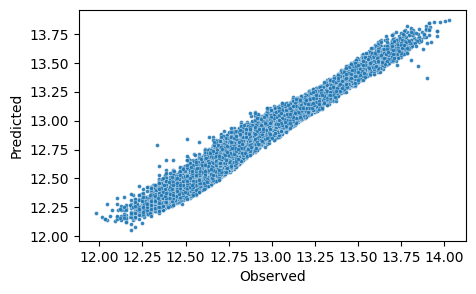

In [264]:
plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x=np.log(x_test)['resale_price'], y=y_pred, edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')#, ax.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000])
ax.set_ylabel('Predicted')#, ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000])
# ax.annotate('Adjusted R\u00b2: ' + str(format(round(lin_reg.rsquared_adj,2),'.2f')), xy=(0, 1), xytext=(25, -25),
#     xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()

In [249]:
lin_reg = linear_model.LinearRegression() 
lin_reg.fit(x_train, np.log(y_train))

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, np.log(y_train))}')

Coefficients: [-2.41976172e-04  9.27918300e-03  1.64116243e-05  1.27578423e-03
  1.50769034e-03 -4.36502196e-03  1.88061374e-06  4.84609297e-04]
Intercept: 20.210203982377287
R^2 score: 0.9701981201219916


In [257]:
y_pred = lin_reg.predict(x_test)

In [259]:
model_evaluation(y_pred, y_test)

Accuracy score: 214031060638.29184




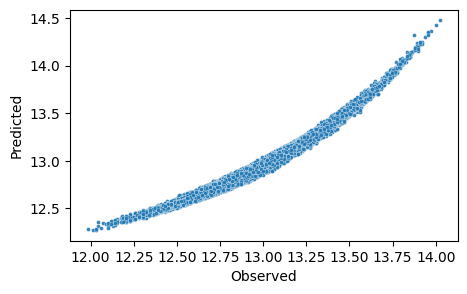

In [258]:
plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x=np.log(x_test)['resale_price'], y=y_pred, edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')#, ax.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000])
ax.set_ylabel('Predicted')#, ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000])
# ax.annotate('Adjusted R\u00b2: ' + str(format(round(lin_reg.rsquared_adj,2),'.2f')), xy=(0, 1), xytext=(25, -25),
#     xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()